In [2]:

import math
import numpy as np
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
# from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# import geocoder

# import requests # library to handle requests
# from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from datetime import datetime

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
# import folium # map rendering library

# from bs4 import BeautifulSoup
# import html5lib

import warnings
warnings.simplefilter("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

print('Libraries imported.')

Libraries imported.


In [3]:
slab_sales = pd.read_excel(r'C:\Users\15146\Desktop\Forecast\SalesSummary_Mtl.xlsx')

In [4]:
# slab_sales.iloc[[-1,0]]
# slab_sales.head()

In [5]:
# slab_sales.info()

In [6]:
slab_sales.columns = slab_sales.iloc[1]
slab_sales = slab_sales.iloc[2:]
slab_sales.reset_index(drop=True)
slab_sales.head()

1,Item Name,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,NaN
2,Alaska Wave 3cm - Discontinued,0,0,0,0,0,0,0,0,0,0,2,1,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1980,990,2112,3036,0,0,0,0,0,0,0,0,0,0,NaN
3,Amethyst 3cm,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1600,0,0,1448,0,0,0,2896,0,1448,NaN
4,Antique Concrete Leathered 3cm / Discontinued,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1125,0,0,0,0,0,0,0,0,NaN
5,Antonio 3cm,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3790,0,0,4042.67,0,0,0,0,0,0,0,0,0,0,0,NaN
6,Aqua White 2cm,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,892,0.01,0,0,0,0,NaN


In [7]:
slab_sales.shape[1]

74

In [8]:
# qty = slab_sales.iloc[:, 25:49]
# qty.reset_index(drop=True)
# item_name = slab_sales[['Item Name']]
# item_name.reset_index(drop=True)
# slab_sales_qty = slab_sales[['Item Name']].join(slab_sales.iloc[:, 0:25])
last_col = int((slab_sales.shape[1] + 1)/3)
slab_sales_qty = slab_sales.iloc[:,0:last_col]
slab_sales_qty.head()

1,Item Name,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00
2,Alaska Wave 3cm - Discontinued,0,0,0,0,0,0,0,0,0,0,2,1,2,3,0,0,0,0,0,0,0,0,0,0
3,Amethyst 3cm,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2,0,1
4,Antique Concrete Leathered 3cm / Discontinued,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,Antonio 3cm,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0
6,Aqua White 2cm,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [9]:
slab_sales_qty_total = slab_sales_qty.iloc[[-1]]
slab_sales_qty_total.head()

1,Item Name,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00
142,TOTALS,0,0,0,0,0,0,0,0,102,164,163,158,216,206,199,130,117,158,115,31,182,212,181,189


In [10]:
slab_totals = slab_sales_qty_total.transpose()
slab_totals.head()

,142
1,
Item Name,TOTALS
2018-09-01 00:00:00,0
2018-10-01 00:00:00,0
2018-11-01 00:00:00,0
2018-12-01 00:00:00,0


In [11]:
slab_totals.columns=slab_totals.iloc[0]
slab_totals = slab_totals.iloc[1:]
slab_totals

Item Name,TOTALS
1,
2018-09-01 00:00:00,0
2018-10-01 00:00:00,0
2018-11-01 00:00:00,0
2018-12-01 00:00:00,0
2019-01-01 00:00:00,0
2019-02-01 00:00:00,0
2019-03-01 00:00:00,0
2019-04-01 00:00:00,0
2019-05-01 00:00:00,102


In [12]:
slab_totals = slab_totals.loc[(slab_totals != 0).any(axis=1)]

In [13]:
# slab_totals.columns = ['Date', 'Totals']
# slab_totals.columns
slab_totals.reset_index(inplace=True)
slab_totals.columns = ['Date', 'Totals']
slab_totals['Date'] = pd.to_datetime(slab_totals['Date'])
slab_totals.index = slab_totals['Date']
del slab_totals['Date']
slab_totals

,Totals
Date,
2019-05-01,102
2019-06-01,164
2019-07-01,163
2019-08-01,158
2019-09-01,216
2019-10-01,206
2019-11-01,199
2019-12-01,130
2020-01-01,117


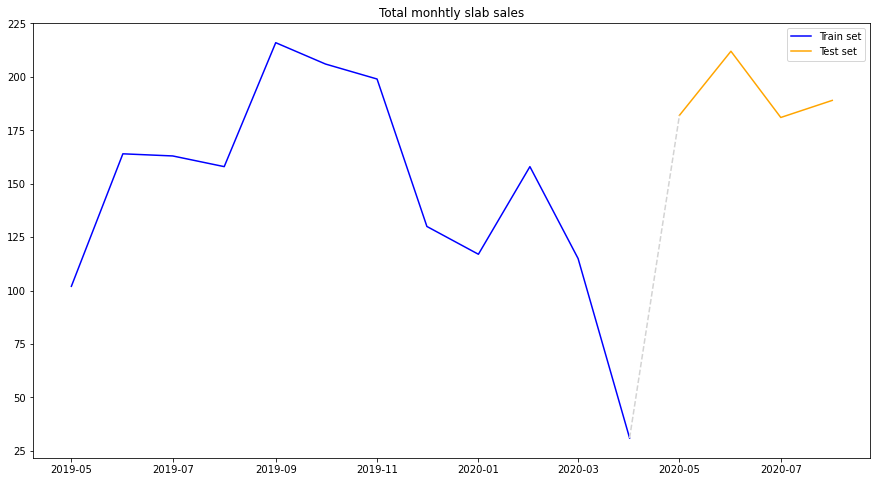

In [14]:
cutoff = math.ceil(slab_totals.shape[0]*0.7)
slab_totals_train = slab_totals[0:cutoff]
slab_totals_test = slab_totals[cutoff:]

plt.figure(figsize=(15,8))
# ax = slab_totals_train.plot(figsize=(15,8), kind='line', y='Totals', color = 'blue', label='Train set')
plt.plot(slab_totals_train, color = 'blue', label='Train set')
# slab_totals_test.plot(ax = ax , figsize=(15,8), kind='line', y='Totals', color = 'orange', label='Test set')
plt.plot(slab_totals_test, color = 'orange', label='Test set')
missing =slab_totals_train.iloc[-1:].append(slab_totals_test.iloc[:1])
plt.plot(missing,color='lightgrey', linestyle = '--')
plt.legend(loc='best')
plt.title('Total monhtly slab sales')
plt.show()

In [15]:
# Adjust sales of April due to COVID effect.
# Using the rolling mean with a window of 6 months, the sale qty for april is estimated.

slab_totals['2020-04'] = slab_totals.rolling(6).mean()['2020-04']



### Apply log transform:

In [16]:
## Apply log to reduce variance of the series:
slab_totals_log = np.log(slab_totals.astype(float))
print(slab_totals_log)

Totals
Date                
2019-05-01  4.624973
2019-06-01  5.099866
2019-07-01  5.093750
2019-08-01  5.062595
2019-09-01  5.375278
2019-10-01  5.327876
2019-11-01  5.293305
2019-12-01  4.867534
2020-01-01  4.762174
2020-02-01  5.062595
2020-03-01  4.744932
2020-04-01  4.828314
2020-05-01  5.204007
2020-06-01  5.356586
2020-07-01  5.198497
2020-08-01  5.241747


### Preparing train and test sets:

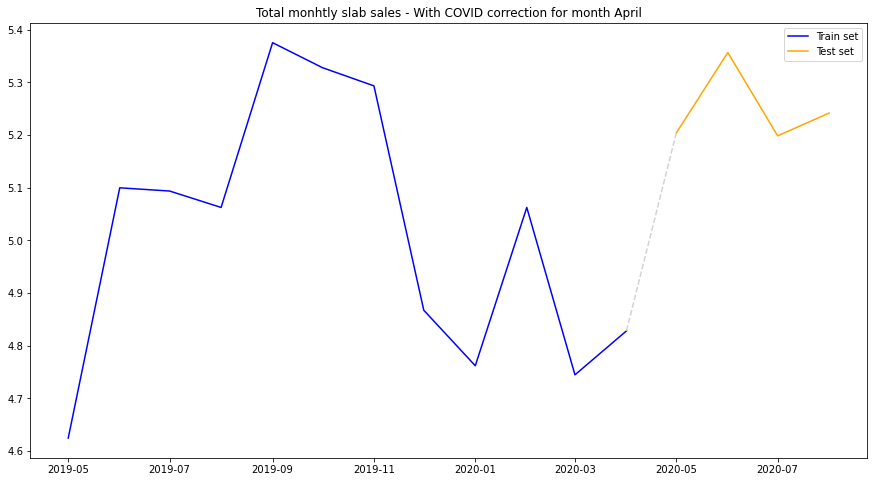

In [17]:
# Preparing the train and test samples:
# 70% of the data will be dedicated to training and the remaining 30% for testing.
cutoff = math.ceil(slab_totals.shape[0]*0.7)
slab_totals_train_log = slab_totals_log[:cutoff]
slab_totals_test_log = slab_totals_log[cutoff:]

# Plotting the figure:
plt.figure(figsize=(15,8))
plt.plot(slab_totals_train_log, color = 'blue', label='Train set')
plt.plot(slab_totals_test_log, color = 'orange', label='Test set')
missing =slab_totals_train_log.iloc[-1:].append(slab_totals_test_log.iloc[:1])

plt.plot(missing,color='lightgrey', linestyle = '--')
plt.legend(loc='best')
plt.title('Total monhtly slab sales - With COVID correction for month April')
plt.show()

## Checking Stationarity:

In [18]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=3).mean()
    rolstd = timeseries.rolling(window=3).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

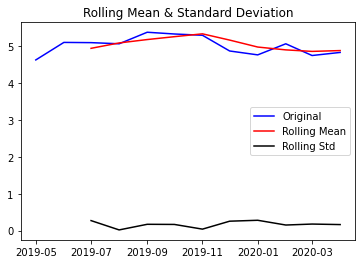

Results of Dickey-Fuller Test:
Test Statistic                 -2.407743
p-value                         0.139563
#Lags Used                      0.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


In [19]:
test_stationarity(slab_totals_train_log)

## Differencing:

In [20]:
# Differencing to make the time series stationary

slab_totals_train_log_diff = slab_totals_train_log.diff(1).dropna()
slab_totals_train_log_diff

,Totals
Date,
2019-06-01,0.474894
2019-07-01,-0.006116
2019-08-01,-0.031155
2019-09-01,0.312683
2019-10-01,-0.047402
2019-11-01,-0.034571
2019-12-01,-0.425770
2020-01-01,-0.105361
2020-02-01,0.300421


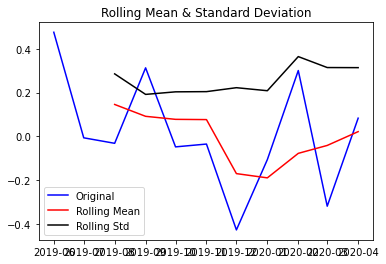

Results of Dickey-Fuller Test:
Test Statistic                 -4.062036
p-value                         0.001118
#Lags Used                      0.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


In [21]:
#Check stationarity to see if differencing had and effect on making the series stationary
test_stationarity(slab_totals_train_log_diff) 
# We see that the time series is stationay with a confidence level of 95%

In [22]:
# must have 2 complete cycles requires 24 observations.
# from statsmodels.tsa.seasonal import seasonal_decompose
# decomposition = seasonal_decompose(slab_totals)

# trend = decomposition.trend
# seasonal = decomposition.seasonal
# residual = decomposition.resid

## ACF & PACF

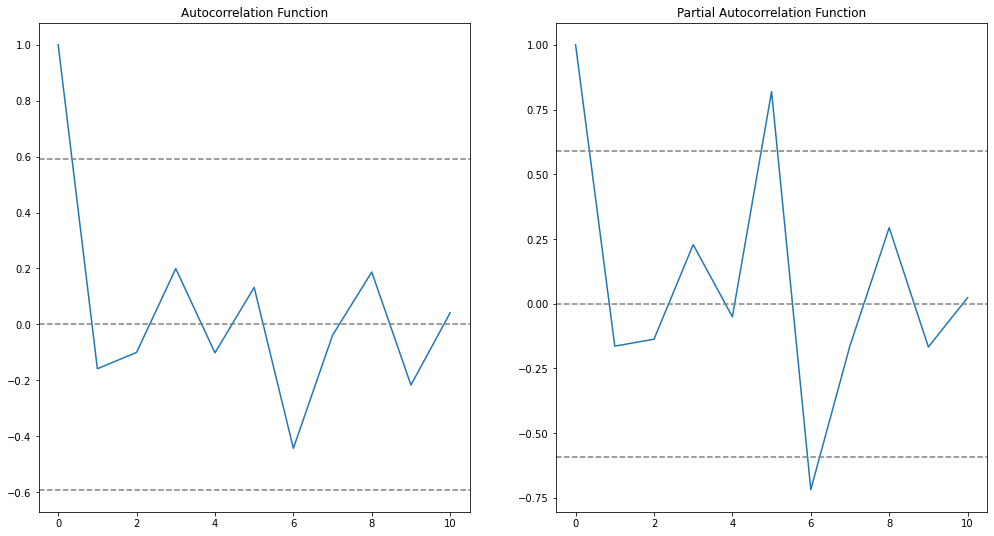

In [23]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(slab_totals_train_log_diff, nlags=10) # nlags is the number of lags to be displayed on the graph
lag_pacf = pacf(slab_totals_train_log_diff, nlags=10, method='ols')

plt.figure(figsize=(17,9))
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(slab_totals_train_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(slab_totals_train_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(slab_totals_train_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(slab_totals_train_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
# plt.tight_layout()
plt.show()

## ARIMA

### Preparing some tools

In [24]:
# x% MAPE implies the model is about (100-x)% accurate in predicting the next n observations.
def mape(y_true, y_pred): 
    # y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Preparing libraries

In [25]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

In [26]:
import warnings
warnings.filterwarnings("ignore")
# Build a dataframe for different combination of p and q and compute the mape(train set, fitted values) as well as the mape(train set, forecast) 
p_q_mape = pd.DataFrame(columns = ['p','q','mape', 'mape_fc'])
for p in np.arange(12):
    for q in np.arange(12):
        try:
            model = SARIMAX(slab_totals_train_log.astype(float), order=(p, 1, q), seasonal_order = (0, 0, 0, 12))
            results_ARIMA = model.fit(disp=0)
            mape_train = mape(slab_totals_train_log['Totals'], results_ARIMA.fittedvalues)
            fc_log = results_ARIMA.forecast(len(slab_totals_test_log))
            fc = np.exp(fc_log)
            mape_forecast = mape(slab_totals_test['Totals'], fc)
            AIC = results_ARIMA.aic
            BIC = results_ARIMA.bic
            # print("p(%.4f), q(%.4f):  MAPE %.4f MAPE_FC %.4f"%(p,q, mape, mape_forecast))
        except:
            mape_train = None
            mape_forecast = None
            # print("p(%.4f), q(%.4f): "%(p,q) + 'MAPE none MAPE_FC none')
        p_q_mape = p_q_mape.append(pd.DataFrame({'p': p, 'q':q, 'mape': mape_train, 'mape_fc': mape_forecast, 'AIC': AIC, 'BIC': BIC }, index=[0]), ignore_index=True)

rmation was'
C:\Users\15146\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\15146\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\15146\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\15146\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No fr

In [27]:
# Sort the dataframe by ascending mape and mape_forecast:
p_q_mape[p_q_mape.mape != None]
p_q_mape.sort_values(by='mape_fc', ascending = True, inplace=True)
p_q_mape.head()

,p,q,mape,mape_fc,AIC,BIC
64,5,4,11.060416,7.406989,12.141855,16.120808
58,4,10,10.625724,8.135836,17.866660,23.835089
52,4,4,10.992371,9.266371,10.662979,14.244037
65,5,5,10.913909,9.870614,14.226358,18.603206
70,5,10,10.527938,10.606906,20.079531,26.445856


In [28]:
# Select the values of p and q that render the lowest forecast mape (remeber that forecast mape is the mean absolute error between the test set and the forecast values)
p_selected = list(p_q_mape[p_q_mape.mape_fc == p_q_mape.mape_fc.min()]['p'])[0]
q_selected = list(p_q_mape[p_q_mape.mape_fc == p_q_mape.mape_fc.min()]['q'])[0]

In [29]:
print("Values of p & q rendering lowest forecast mape: p(%.4f), q(%.4f)"%(p_selected,q_selected))

Values of p & q rendering lowest forecast mape: p(5.0000), q(4.0000)


### Defining the selected model

In [30]:

# The p,d,q values can be specified using the order argument of ARIMA which take a tuple (p,d,q).
# model = SARIMAX(slab_totals_train_log.diff(2).dropna().astype(float), order=(0, 0, 1))

# model = SARIMAX(slab_totals_train_log.astype(float), order=(7, 1, 7), seasonal_order = (0, 0, 0, 12)) # Best mape with fitted values
# model = SARIMAX(slab_totals_train_log.astype(float), order=(5, 1, 4), seasonal_order = (0, 0, 0, 12)) # Best mape forecast compared to test set

model_selected = SARIMAX(slab_totals_train_log.astype(float), order=(p_selected, 1, q_selected), seasonal_order = (0, 0, 0, 12)) 

results_ARIMA = model_selected.fit(disp=0) 
print(results_ARIMA.summary())

C:\Users\15146\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\15146\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
                               SARIMAX Results                                
Dep. Variable:                 Totals   No. Observations:                   12
Model:               SARIMAX(5, 1, 4)   Log Likelihood                   3.929
Date:                Wed, 02 Sep 2020   AIC                             12.142
Time:                        17:10:01   BIC                             16.121
Sample:                    05-01-2019   HQIC                             9.634
                    

### Analyzing the model:

RMS: 1.3487
RSS: 21.8282


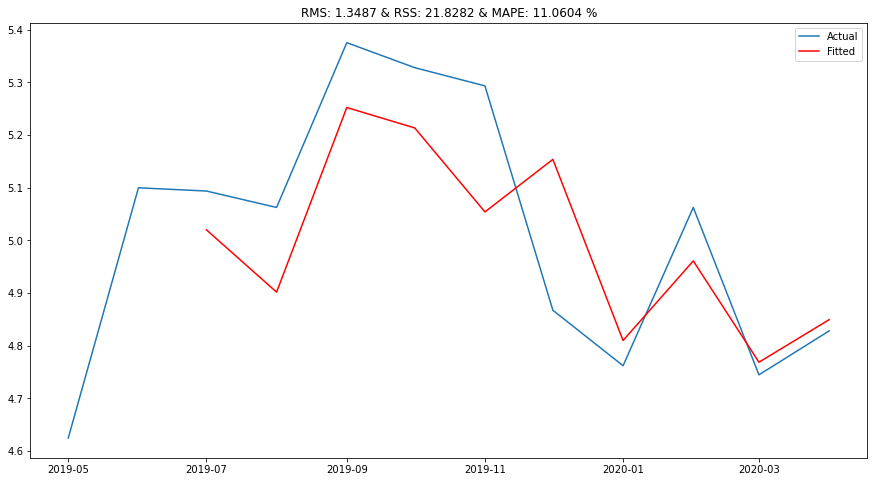

In [31]:
plt.figure(figsize=(15,8)) 
plt.plot(slab_totals_train_log, label='Actual')
plt.plot(results_ARIMA.fittedvalues[2:], color='red',label = 'Fitted')
plt.legend(loc='best')

rss = sum((results_ARIMA.fittedvalues-slab_totals_train_log['Totals'])**2)

rms = sqrt(mean_squared_error(slab_totals_train_log['Totals'],results_ARIMA.fittedvalues))
# rms = 0

mape_train = mape(slab_totals_train_log['Totals'], results_ARIMA.fittedvalues)

plt.title('RMS: %.4f & RSS: %.4f & MAPE: %.4f %%'%(rms,rss, mape_train))

print('RMS: %.4f'% rms)
print('RSS: %.4f'% rss)

In [32]:
results_ARIMA.fittedvalues.shape
# slab_totals_train

(12,)

<Figure size 1224x648 with 0 Axes>

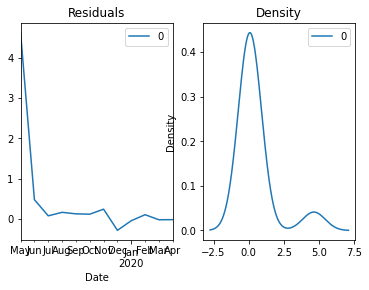

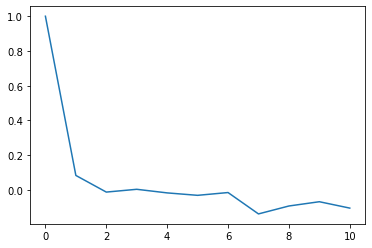

In [33]:
residuals = pd.DataFrame(results_ARIMA.resid)
plt.figure(figsize=(17,9))
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

resid_acf = acf(results_ARIMA.resid, nlags=10)
plt.plot(resid_acf)

### Forecasting and comparing to the test set

RSS: 0.0259
RMS: 0.0805
MAPE: 1.3798%


Text(0.5, 1.0, 'RMS: 0.0805 & RSS: 0.0259 & MAPE: 1.3798 %')

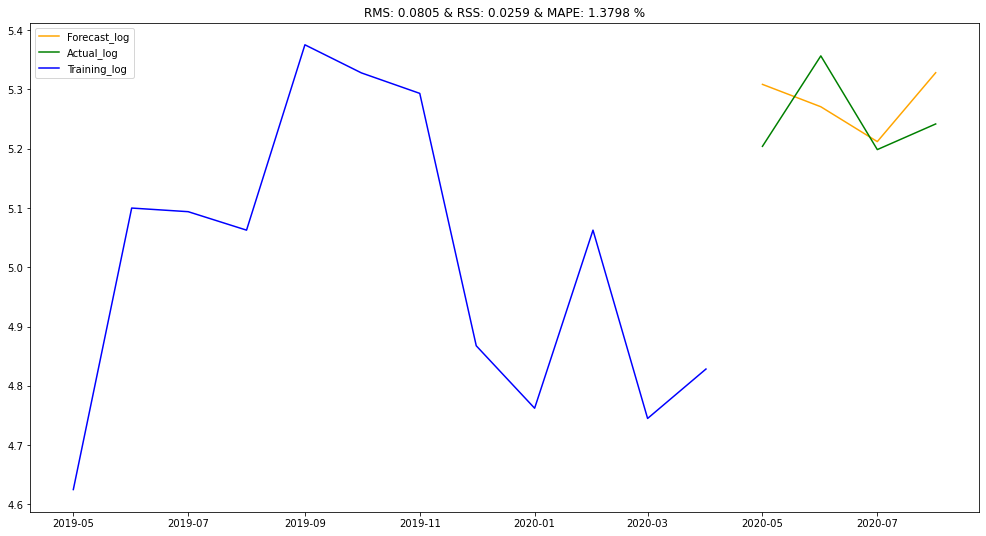

In [34]:
# Computing forecast data based on the length of the test set:
fc_log = results_ARIMA.forecast(len(slab_totals_test_log))  # 95% conf

plt.figure(figsize=(17,9))
plt.plot(fc_log, color='orange', label='Forecast_log')
plt.plot(slab_totals_test_log, color='green', label='Actual_log')
plt.plot(slab_totals_train_log, color='blue', label='Training_log')
plt.legend(loc='best')

rss_log_forecast = sum((fc_log-slab_totals_test_log['Totals'])**2)
print('RSS: %0.4f'%rss_log_forecast)

rms_log_forecast = sqrt(mean_squared_error(slab_totals_test_log['Totals'],fc_log))
print('RMS: %0.4f'%rms_log_forecast)

mape_log_forecast = mape(slab_totals_test_log['Totals'], fc_log)
print('MAPE: %0.4f%%'%mape_log_forecast)

plt.title('RMS: %.4f & RSS: %.4f & MAPE: %.4f %%'%(rms_log_forecast,rss_log_forecast, mape_log_forecast))

RSS: 1003.4269
RMS: 15.8385
MAPE: 7.4070%


Text(0.5, 1.0, 'RMS: 15.8385 & RSS: 1003.4269 & MAPE: 7.4070 %')

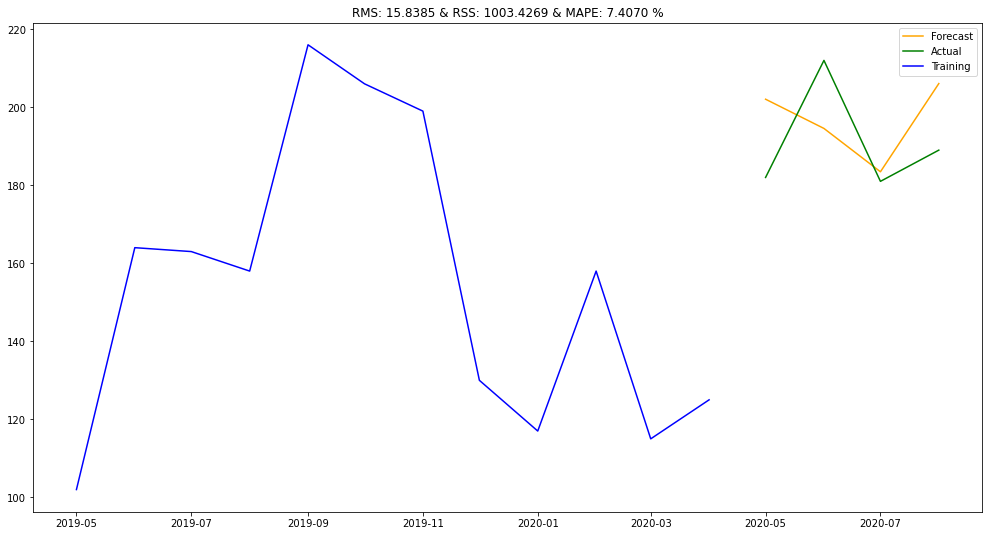

In [35]:
fc = np.exp(fc_log)
plt.figure(figsize=(17,9))
plt.plot(fc, color='orange', label='Forecast')
plt.plot(np.exp(slab_totals_test_log), color='green', label='Actual')
plt.plot(np.exp(slab_totals_train_log), color='blue', label='Training')
plt.legend(loc='best')

rss_forecast = sum((fc-slab_totals_test['Totals'])**2)
print('RSS: %0.4f'%rss_forecast)

rms_forecast = sqrt(mean_squared_error(slab_totals_test['Totals'],fc))
print('RMS: %0.4f'%rms_forecast)

mape_forecast = mape(slab_totals_test['Totals'], fc)
print('MAPE: %0.4f%%'%mape_forecast)

plt.title('RMS: %.4f & RSS: %.4f & MAPE: %.4f %%'%(rms_forecast,rss_forecast, mape_forecast))

## Retraining the model on the whole set and forecasting 2 months:

In [36]:
model_retrained = SARIMAX(slab_totals_log.astype(float), order=(7, 1, 7), seasonal_order = (0, 0, 0, 12)) 

results_ARIMA_retrained = model_retrained.fit(disp=0) 

C:\Users\15146\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\15146\AppData\Local\Programs\Python\Python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RMS: 1.3487 & RSS: 21.7556 & MAPE: 8.1058 %')

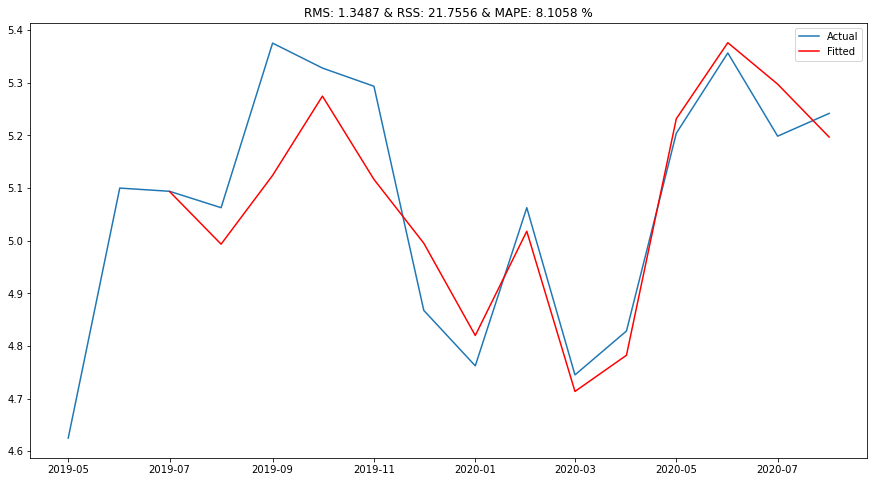

In [37]:
plt.figure(figsize=(15,8)) 
plt.plot(slab_totals_log, label='Actual')
plt.plot(results_ARIMA_retrained.fittedvalues[2:], color='red',label = 'Fitted')
plt.legend(loc='best')

rss = sum((results_ARIMA_retrained.fittedvalues-slab_totals_log['Totals'])**2)

# rms = sqrt(mean_squared_error(slab_totals_log['Totals'],results_ARIMA_retrained.fittedvalues))

mape_train = mape(slab_totals_log['Totals'], results_ARIMA_retrained.fittedvalues)

plt.title('RMS: %.4f & RSS: %.4f & MAPE: %.4f %%'%(rms,rss, mape_train))

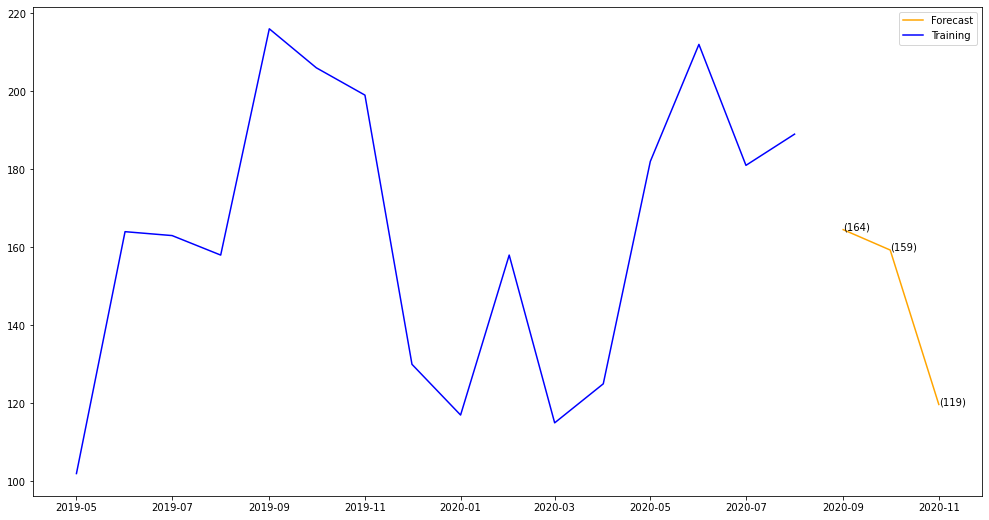

In [38]:
# Perform a forecast for next 3 months:
fc_retrained_log = results_ARIMA_retrained.forecast(3)

fc_retrained = np.exp(fc_retrained_log)

plt.figure(figsize=(17,9))
plt.plot(fc_retrained, color='orange', label='Forecast')
plt.plot(slab_totals, color='blue', label='Training')
plt.legend(loc='best')

for date, qty in zip(fc_retrained.index, list(fc_retrained.iloc[0:3,])):
    plt.text(date, qty, '({})'.format(math.floor(qty)))

# rss_forecast = sum((fc_retrained-slab_totals['Totals'])**2)
# print('RSS: %0.4f'%rss_forecast)

# rms_forecast = sqrt(mean_squared_error(slab_totals['Totals'],fc_retrained))
# print('RMS: %0.4f'%rms_forecast)

# mape_forecast = mape(slab_totals['Totals'], fc_retrained)
# print('MAPE: %0.4f%%'%mape_forecast)

# plt.title('RMS: %.4f & RSS: %.4f & MAPE: %.4f %%'%(rms_forecast,rss_forecast, mape_forecast))

## Auto Arima

In [39]:
import pmdarima as pmd

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              trace=True)
    return autoarima_model

In [40]:
arima_model = arimamodel(slab_totals_train_log)
print(arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=10.065, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=11.022, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=10.424, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=8.320, Time=0.02 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=9.860, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=11.812, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.278 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:               SARIMAX(0, 2, 1)   Log Likelihood                  -2.160
Date:                Wed, 02 Sep 2020   AIC                              8.320
Time:                        17:10:05   BIC                              8.925
Sample:                             0   HQ

## Predictions and test verification:

### ARIMA

In [41]:
# start = len(slab_totals_train) 
# end = len(slab_totals_train) + len(slab_totals_test) - 1
# forecast = results_ARIMA.forecast(len(slab_totals_test))